In [1]:
#load Libraries
import os
import cv2 #opencv library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Load the data
test_dataset_path = "C:/Users/lenovo/Desktop/CNN/Testing_data"
training_dataset_path = "C:/Users/lenovo/Desktop/CNN/Training_data"

In [ ]:
# from PIL import Image
# from pillow_heif import register_heif_opener

In [ ]:
# register_heif_opener()

In [ ]:
# heic_list = []
# for folder in os.listdir(training_dataset_path):
#     folder_path = os.path.join(training_dataset_path, folder)
#     for file_name in os.listdir(folder_path):
#         heic_list.append(folder_path + '/' + file_name)
# print(heic_list)

In [ ]:
# for image in heic_list:
#     temp_photo = Image.open(image)
#     temp = image.replace('.heic', '.jpeg')
#     temp_photo.save(temp)   

In [3]:
#Make list of images
training_data_list_crack = [] #training data list for crack images
training_data_list_no_crack = [] # training data list for no_crack images
for folder in os.listdir(training_dataset_path):
    folder_path = os.path.join(training_dataset_path, folder)
    for file_name in os.listdir(folder_path):
        if folder == "Crack":
            training_data_list_crack.append(folder_path + '/' + file_name) #If folder name reads as crack 
        else:
            training_data_list_no_crack.append(folder_path + '/' + file_name) #If folder name reads as no_crack

testing_data_list_crack = [] #testing data list for crack images
testing_data_list_no_crack = [] ##testing data list for no_crack images
for folder in os.listdir(test_dataset_path):
    folder_path = os.path.join(test_dataset_path, folder)
    for file_name in os.listdir(folder_path):
        if folder == "Crack":
            testing_data_list_crack.append(folder_path + '/' + file_name) #If folder name reads as crack
        else:
            testing_data_list_no_crack.append(folder_path + '/' + file_name) #If folder name reads as no_crack

In [4]:
#Resize all iamges and label the images 1 for crack and 0 for no_crack for training data
img_size = 300
train_data = []
train_labels = []
for image in training_data_list_crack:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE) #read the images from dataset we made earlier
    img1 = cv2.resize(img, (img_size, img_size)) #resize the images by image size provided
    train_data.append(img1) #adding resized image to training data
    train_labels.append(1) #add to the list of labels in crack dataset
for image in training_data_list_no_crack:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img, (img_size, img_size))
    train_data.append(img1)
    train_labels.append(0) #add to the list of labels in no_crack dataset

In [5]:
#Resize all iamges and label the images 1 for crack and 0 for no_crack for testing data
img_size = 300
test_data = []
test_labels = []
for image in testing_data_list_crack:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE) #read the images from dataset we made earlier
    img1 = cv2.resize(img, (img_size, img_size)) #resize the images by image size provided 
    test_data.append(img1) #adding resized image to training data
    test_labels.append(1) #add to the list of labels in crack dataset
for image in testing_data_list_no_crack:
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img, (img_size, img_size))
    test_data.append(img1)
    test_labels.append(0) #add to the list of labels in no_crack dataset

In [6]:
#Normalize the images for training and testing data 
train_data = np.array(train_data).reshape(-1, img_size, img_size, 1) / 255.0
train_labels = np.array(train_labels)
test_data = np.array(test_data).reshape(-1, img_size, img_size, 1) / 255.0
ground_truth = np.array(test_labels) #reference for the reality

In [7]:
#Split the training data into train and validation  sets
train_data, validate_data, train_labels, validate_labels = train_test_split(train_data, train_labels, test_size=0.2) #20% validation data

In [8]:
# perform data augmentation to increase the size of the data
train_datagen = ImageDataGenerator() #Increse the size of dataset for better training of the model
train_generator = train_datagen.flow(train_data,train_labels,batch_size=40) #create batches to feed the model

In [9]:
#Create CNN model 
model = Sequential([
    Conv2D(30, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)), 
    MaxPooling2D((2, 2)),
    Conv2D(50, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
#Train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')
history = model.fit(train_generator, epochs=20,validation_data=(validate_data, validate_labels)) #Fitting the model

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.9958 - accuracy: 0.5056 - val_loss: 0.5951 - val_accuracy: 0.7353
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6420 - accuracy: 0.6580 - val_loss: 0.5528 - val_accuracy: 0.7353
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.5891 - accuracy: 0.6580 - val_loss: 0.5684 - val_accuracy: 0.7353
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5348 - accuracy: 0.6580 - val_loss: 0.5121 - val_accuracy: 0.8088
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.4794 - accuracy: 0.7435 - val_loss: 0.5042 - val_accuracy: 0.8088
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.4358 - accuracy: 0.7584 - val_loss: 0.4843 - val_accuracy: 0.8382
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.3797 - accuracy: 0.8401 - val_loss: 0.4706 - val_accuracy: 0.8088
Epoch 8/20
7/7 [=========================

In [11]:
#Test CNN model on the test dataset
test_loss, test_acc = model.evaluate(test_data, ground_truth)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

5/5 [==============================] - 1s 232ms/step - loss: 1.1865 - accuracy: 0.6849
Test loss: 1.1865465641021729
Test accuracy: 0.6849315166473389


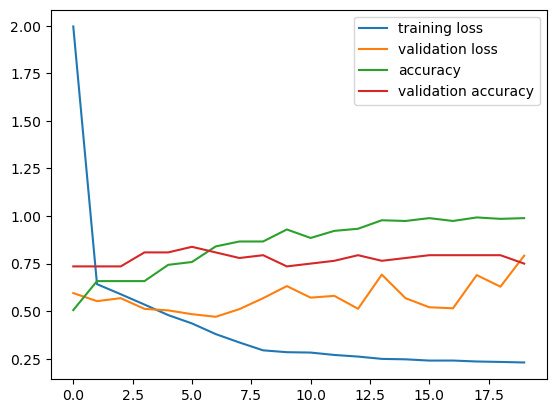

In [12]:
#Plot the training and validation loss and accuracy per epoch
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()